In [1]:
import torch
import util
import custum_dataset
from torch.utils.data import DataLoader
from model import Model,save_model
import torch.optim.lr_scheduler as lr_scheduler
import numpy as np
import matplotlib.pyplot as plt


# 1.setting up

In [2]:
torch.manual_seed(42)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
path = f'C:/Users/yy/Desktop/dl_project/data/data.txt'  

c = util.config()

data_train,stoi,itos = util.load_data_with_split(path,c.split,type='train')
data_test,_,_ = util.load_data_with_split(path,c.split,type='test')


dataset_train = custum_dataset.CustomDataset(c.sequence_l,device,stoi,itos,data_train,repeat = False)
data_loader_train = DataLoader(dataset_train, c.batch_size, shuffle=True)
dataset_test = custum_dataset.CustomDataset(c.sequence_l,device,stoi,itos,data_test,repeat = False)
data_loader_test = DataLoader(dataset_test, c.batch_size, shuffle=True)

m = Model(stoi=dataset_train.stoi).to(device)

optimizer = torch.optim.Adam(m.parameters(), lr=c.learning_rate)
# scheduler = lr_scheduler.ReduceLROnPlateau(optimizer,mode='min', factor=0.1, patience=5)
nb_epoch = 4000

milestones = np.arange(0,nb_epoch,50)
scheduler = lr_scheduler.MultiStepLR(optimizer, milestones, 0.1)
MODEL_NAME = str(nb_epoch)+"epoch_model_seed42_without_lrd.pth"

# 2. train and evaluate

In [3]:
train_data_iterator = iter(data_loader_train)
test_data_iterator = iter(data_loader_test)
train_loss_list = []
test_loss_list = []
perplexity_train_list = []
perplexity_test_list = []

for epoch in range(nb_epoch):
    m.train()
    x,y = next(train_data_iterator)
    logit, loss, perplexity = m(x,use='train',y = y)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    m.eval()
    with torch.inference_mode():
        x_t,y_t = next(test_data_iterator)
        test_logit, test_loss, test_perplexity = m(x_t, use='train', y=y_t)

    if epoch%50 == 0:
        print(f"Epoch {epoch + 1}/{nb_epoch}, Loss: {loss:.4f}, Perplexity: {perplexity:.4f}")
        print(f"Test Loss: {test_loss:.4f}, Test Perplexity: {test_perplexity:.4f}")

    scheduler.step()
    train_loss_list.append(loss.cpu().detach().numpy())
    test_loss_list.append(test_loss.cpu().detach().numpy())
    perplexity_train_list.append(perplexity.cpu().detach().numpy())
    perplexity_test_list.append(test_perplexity.cpu().detach().numpy())

save_model(m, MODEL_NAME)


Epoch 1/4000, Loss: 4.3329, Perplexity: 76.1671
Test Loss: 3.6897, Test Perplexity: 40.0345


# 3. Plot loss and perplexity 

Text(0, 0.5, 'perplexity')

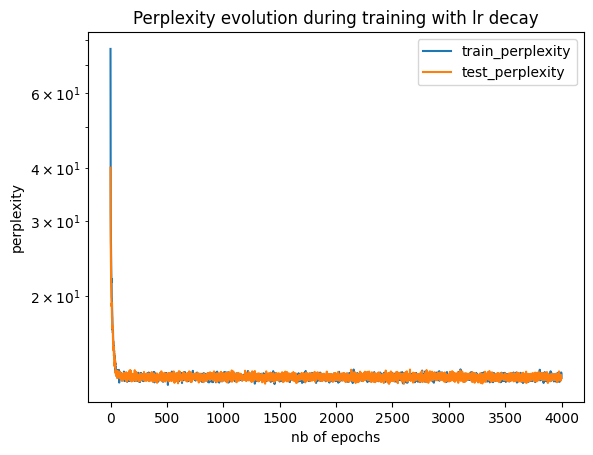

In [4]:
epoch_list = np.arange(0,len(perplexity_train_list))
plt.plot(epoch_list,perplexity_train_list)
plt.plot(epoch_list,perplexity_test_list)
plt.yscale("log")
plt.title('Perplexity evolution during training without lr decay')
plt.legend(['train_perplexity','test_perplexity'])
plt.xlabel('nb of epochs')
plt.ylabel('perplexity')

Text(0, 0.5, 'cross entropy loss')

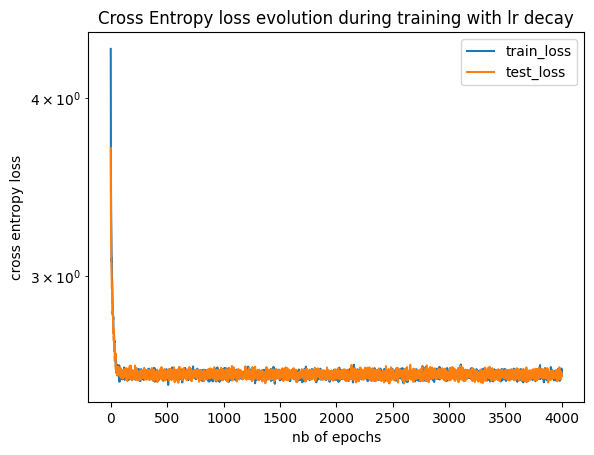

In [5]:
epoch_list = np.arange(0,len(train_loss_list))
plt.plot(epoch_list,train_loss_list)
plt.plot(epoch_list,test_loss_list)
plt.yscale("log")
plt.title('Cross Entropy loss evolution during training without lr decay')
plt.legend(['train_loss','test_loss'])
plt.xlabel('nb of epochs')
plt.ylabel('cross entropy loss')



In [6]:
nb_char = 3000

seed = "I saw a dumb cat holding an apple on its head, "
input_idx = util.encode(seed,stoi)

input_idx = torch.tensor(input_idx,dtype=torch.long)
input_idx = torch.unsqueeze(input_idx, 0).to(device)


In [7]:
m.eval()
with torch.no_grad():
    out = m.generate(nb_char,input_idx,'sample')
    out = util.decode(out,itos)
    
print(out)
util.save_generated_text('output'+str(nb_epoch)+'_epochs_sample_no_lr_d.txt',out)

I saw a dumb cat holding an apple on its head, de: arundiZWir nd linbrpor gharditenpl wo athy, I imeay we,
NGewasif brhe:
ThaoHite cre.
HEI ig wed oJmy burs:
Bureend aingh then thos s thsuls seunde,
Nicindn.
C IO ser spe, kin tage.
Bupe,
Ton ge mo maverewshancoonousthaise Pmen or :
Th
AAn gorathoYouse aykh.
&er banemyod'lowe h he anuinee d m.
And e!
OUs.
WQ s gy in t the ber ithe
Bry f whear preromes chwind ksespereenase VMalilerer gopyoornth c;
ondare ngousoul atowild f me singor f aldave d
Cebus, omyouy hicheo!
And bow y:
I therisctkthe mhert.
TINI allll the tof he me OLCeI' tres five.
Noonclire an Doutsu e d'rsouris athel.


D hecKI INIONII se d wis iencemy, 's iceeec$IOMEOLAu icrdllle
Thanstsitheonodpasitr ullle we mshe is, by my urg?
ARSHOenentotheUI dn as sond t s t wimes E

Lvestwoure thf Iis lly I: we meagrthee pepom wie,
I rs'oule hthomKUTSerer? athoro s wse fe s bnocoHon Wher k'ouseathere
Thes ay er hend Me l! Yy y wiler fyomosimesear e therdKI ,

Ser.
; shor beenvesche L
I h

In [8]:
m.eval()
with torch.no_grad():
    out = m.generate(nb_char,input_idx,'high_prob')
    out = util.decode(out,itos)
print(out)

util.save_generated_text('output'+str(nb_epoch)+'epochs_high_prob_no_lr_d.txt',out)




I saw a dumb cat holding an apple on its head, the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the t